### 1° Task 

In this opportunity, we share with you a DataFrame with the bathymetry and gravity disturbance profile of the island of Oahu in Hawaii.

**Steps:**
1. Load the file.
2. Clean the DataFrame, so check if the DataFrame has:
    * NaN values and remove them.
    * duplicate rows and remove them.
    * any other problems like out of range values and remove them.
3. Plot the _gravity disturbance & distance_ and the _bathimetry & distance_ using `subplot`.
   Make the plot as if you were going to put it in an article. 


### Bonus track

We can see from the bathymetry profile that there is a long-wavelength component (almost a gaussian shape) right around the islands.
This is due to the _thermal swell_ of the hotspot and not part of the flexure response of the oceanic lithosphere.
The swell is isostatically compensated, as seen in the gravity disturbance.
We'll fit a gaussian curve to the profile data and remove it from our observations to obtain a residual.

**Steps:**
1. Define the gaussian function:
   $$ h_{gauss} (x) = h_{0} + G \exp \left(-\dfrac{(x - x_0)^2}{\sigma^2}\right) $$
    
2.  Estimate the parameters of this function ($h_0$, $G$, $x_0$, $\sigma$). You can start with ($h_0$, $G$, $x_0$, $\sigma$) = (hawaii.distance_km, h0=-5.5, G=1.5, x0=1300, sigma=450).
3. Calculate the thermal swell.
4. Calculate a residual topography and store it in our original `DataFrame`.
   $$ residual = topography_{km} - swell$$
5. Make the plot using `subplot` as if you were going to put it in an article. 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import numpy as np
 


In [3]:
pwd

'/home/jupyter-giuliano.camillett-3f926/coco_coding_homework'

In [4]:
datafolder = Path("..") / "coco_coding_homework"
data_hawaii = pd.read_csv(datafolder /"hawaii-profile.csv")

In [5]:
#para saber con que datos estamos trabajando y la forma general del dataframe

data_hawaii.head()


,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,13.000000,-165.000000,0.000000,-4.161000,23.008098
1,13.082915,-164.929648,12.070042,-4.747907,21.180807
2,13.165829,-164.859296,24.140085,-5.452608,18.099661
3,13.248744,-164.788945,36.210127,-5.581402,14.372280
4,13.331658,-164.718593,48.280170,-5.438978,10.606283


In [6]:
# veo la forma del dataframe para tener un punto de referencia para la posterior limpieza de los datos
data_hawaii.shape

(212, 5)

In [7]:
#explorar si mi dataframe tiene valores NaN
data_hawaii.isnull()

,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
207,False,False,False,False,False
208,False,False,False,False,False
209,False,False,False,False,False
210,False,False,False,False,False


In [8]:
# para evitar mostrar todas las columnas y saber si tengo un NaN, lo exploro de la siguiente mannera
data_hawaii.isnull().values.any()

True

In [9]:
# se que tengo nan, si me quiero deshacer de ellos, observar la cantidad de filas al principio y luego
# de esta linea
data_hawaii= data_hawaii.dropna()

In [10]:
#con este comando busco si existen datos duplicados
data_hawaii[data_hawaii.duplicated()]

,latitude,longitude,distance_km,topography_km,disturbance_mgal
56,17.062814,-161.552764,591.432077,-5.542519,4.088689
131,23.198492,-156.346734,1484.615214,-4.237042,26.279725
132,23.198492,-156.346734,1484.615214,-4.237042,26.279725
133,23.198492,-156.346734,1484.615214,-4.237042,26.279725
134,23.198492,-156.346734,1484.615214,-4.237042,26.279725


In [11]:
#sabiendo de la existencia de datos duplicados, los elimino
data_hawaii = data_hawaii.drop_duplicates()

In [12]:
#corroboro su eliminacion
data_hawaii.shape

(201, 5)

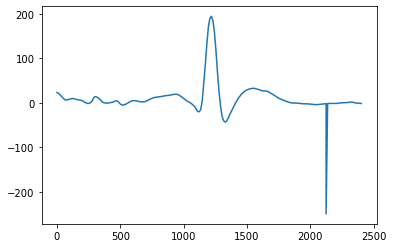

In [13]:
#proyecto variables para ver si existen outliers
plt.plot (data_hawaii.distance_km, data_hawaii.disturbance_mgal)

In [14]:
# genero un filtro que me devuelva los datos que son aoutliers
condicion_outlier = data_hawaii["disturbance_mgal"] < -100

In [15]:
#busco el/los datos outliers para conocer su indice
data_hawaii[condicion_outlier]

,latitude,longitude,distance_km,topography_km,disturbance_mgal
188,27.596965,-152.61819,2124.327461,-5.44891,-250.043523


In [16]:
#elimino los outlier por su indice.
data_hawaii.drop(index=188, axis=0, inplace=True)

In [17]:
#corroboro eliminacion
data_hawaii.shape

(200, 5)

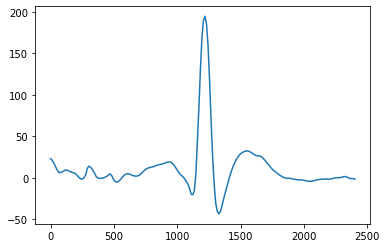

In [18]:
#corroboro eliminacion
plt.plot (data_hawaii.distance_km, data_hawaii.disturbance_mgal)

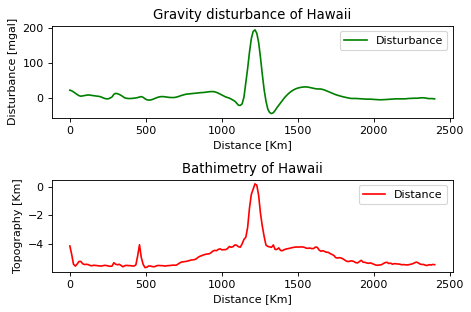

In [19]:
fig = plt.figure(dpi=80, facecolor='w', edgecolor='k') #creo una figura vacia

ax1 = fig.add_subplot(2,1,1) #añado sublot, hay varias maneras, a mi me sirve generar para cada subplot 
# un ax1, ax2, etc, y despues simplemente los llamo para asignar xlabel, ylabel etc.
# al final el comando tight_layout() pone las figuras en correcto espaciamiento, sin eso se me superponen
# elementos de los subplot
ax1.plot(data_hawaii.distance_km, data_hawaii.disturbance_mgal, color = 'green', label='Disturbance', linestyle='-') 
ax1.set_xlabel(r'Distance [Km]')
ax1.set_ylabel(r'Disturbance [mgal]')
ax1.title.set_text('Gravity disturbance of Hawaii')
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(data_hawaii.distance_km, data_hawaii.topography_km, color = 'red', label='Distance', linestyle='-') 
ax2.set_xlabel(r'Distance [Km]')
ax2.set_ylabel(r'Topography [Km]')
ax2.title.set_text('Bathimetry of Hawaii')
ax2.legend()

fig.tight_layout()

**Steps:**
1. Define the gaussian function:
   $$ h_{gauss} (x) = h_{0} + G \exp \left(-\dfrac{(x - x_0)^2}{\sigma^2}\right) $$
    
2.  Estimate the parameters of this function ($h_0$, $G$, $x_0$, $\sigma$). You can start with ($h_0$, $G$, $x_0$, $\sigma$) = (hawaii.distance_km, h0=-5.5, G=1.5, x0=1300, sigma=450).
3. Calculate the thermal swell.
4. Calculate a residual topography and store it in our original `DataFrame`.
   $$ residual = topography_{km} - swell$$
5. Make the plot using `subplot` as if you were going to put it in an article. 



In [20]:
h0=-5.5
G=1.5
x0=1300
sigma=450
x = data_hawaii.topography_km
hgauss= h0 + G*np.exp(-((x-x0)/(sigma**2)))


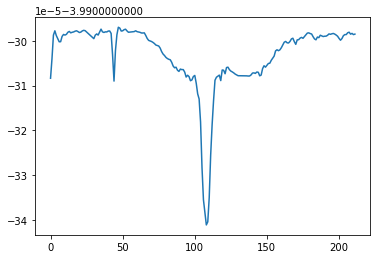

In [21]:
plt.plot(hgauss)

0     -4.161000
1     -4.747907
2     -5.452608
3     -5.581402
4     -5.438978
         ...   
207   -5.539440
208   -5.481472
209   -5.503901
210   -5.467104
211   -5.483000
Name: topography_km, Length: 200, dtype: float64


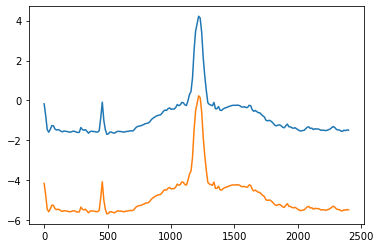

In [23]:
residual = data_hawaii.topography_km - hgauss
plt.plot (data_hawaii.distance_km, residual)
plt.plot(data_hawaii.distance_km, data_hawaii.topography_km)

0     -0.170692
1     -0.757603
2     -1.462309
3     -1.591105
4     -1.448679
         ...   
207   -1.549141
208   -1.491174
209   -1.513603
210   -1.476806
211   -1.492701
Name: topography_km, Length: 200, dtype: float64


In [26]:
print(hgauss)

0     -3.990308
1     -3.990304
2     -3.990299
3     -3.990298
4     -3.990299
         ...   
207   -3.990298
208   -3.990299
209   -3.990298
210   -3.990299
211   -3.990299
Name: topography_km, Length: 200, dtype: float64


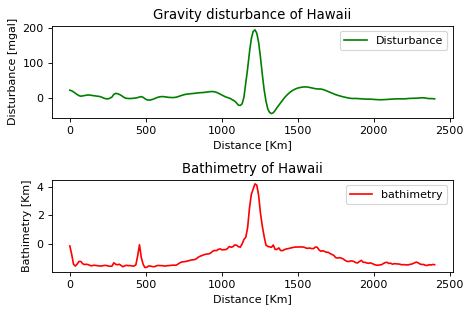

In [24]:
fig = plt.figure(dpi=80, facecolor='w', edgecolor='k') #creo una figura vacia

ax1 = fig.add_subplot(2,1,1) #añado sublot, hay varias maneras, a mi me sirve generar para cada subplot 
# un ax1, ax2, etc, y despues simplemente los llamo para asignar xlabel, ylabel etc.
# al final el comando tight_layout() pone las figuras en correcto espaciamiento, sin eso se me superponen
# elementos de los subplot
ax1.plot(data_hawaii.distance_km, data_hawaii.disturbance_mgal, color = 'green', label='Disturbance', linestyle='-') 
ax1.set_xlabel(r'Distance [Km]')
ax1.set_ylabel(r'Disturbance [mgal]')
ax1.title.set_text('Gravity disturbance of Hawaii')
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(data_hawaii.distance_km, residual, color = 'red', label='bathimetry', linestyle='-') 
ax2.set_xlabel(r'Distance [Km]')
ax2.set_ylabel(r'Bathimetry [Km]')
ax2.title.set_text('Bathimetry of Hawaii')
ax2.legend()

fig.tight_layout()

Esta linea es una prueba para explorar el funcionamiento de branches